In [342]:
import os
import pandas as pd



# Build dataset path dynamically
data_path = os.path.join("D:\Project\Auto_ML\data\diabetes.csv")

# Load dataset
df = pd.read_csv(data_path)

# Check numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_cols)

# Check categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)


df.head()


Numerical columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Categorical columns: Index([], dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [343]:
df.describe()
df.dtypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

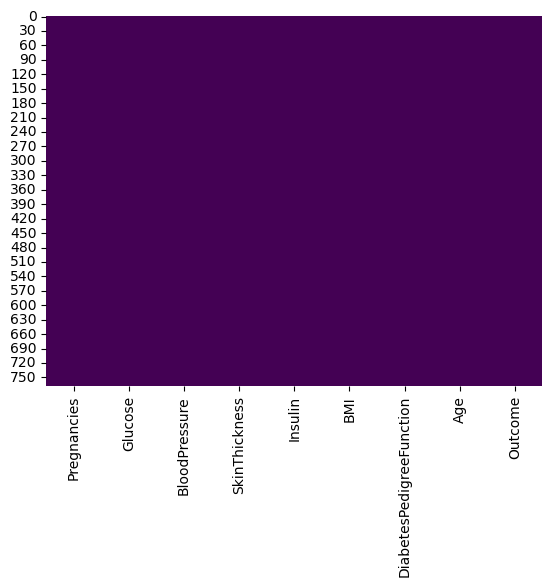

In [344]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


In [345]:
import numpy as np

# Example: introduce 10% nulls in 'Glucose' column
df.loc[df.sample(frac=0.1, random_state=42).index, 'Glucose'] = np.nan


In [346]:
X=df.drop(columns=['Outcome'])
#y=df.drop(columns=[  "Pregnancies" ,'Glucose',	'BloodPressure',
 #                  'SkinThickness'	,'Insulin',	'BMI'	,'DiabetesPedigreeFunction',	'Age'	])
 

y=df['Outcome'] 

In [347]:
#2. Train/Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [348]:
X.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

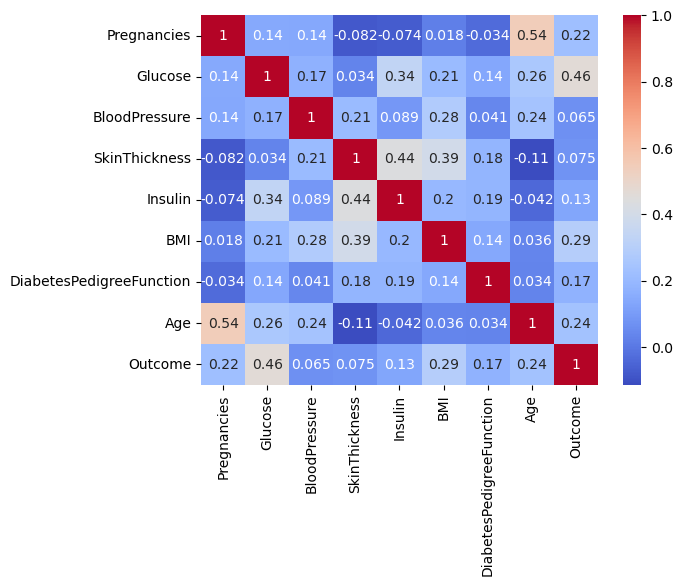

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show

In [350]:
#imputing mean to the mising values
from sklearn.impute import SimpleImputer

num_imputer=SimpleImputer(strategy='mean')
num_imputer.fit(X_train[['Glucose']])

# The calculated mean is stored in statistics_
calculated_mean = num_imputer.statistics_[0]
print("Calculated mean of Glucose:", calculated_mean)

X_train
X_train['Glucose'] = num_imputer.transform(X_train[['Glucose']])
X_test['Glucose']=num_imputer.transform(X_test[['Glucose']])
X_train

# or do both in one step X_train['Glucose'] = num_imputer.fit_transform(X_train[['Glucose']])


Calculated mean of Glucose: 120.85504885993485


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,0,0,0,0.0,0.304,21
618,9,112.0,82,24,0,28.2,1.282,50
346,1,139.0,46,19,83,28.7,0.654,22
294,0,161.0,50,0,0,21.9,0.254,65
231,6,134.0,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64,35,140,28.6,0.411,26
106,1,96.0,122,0,0,22.4,0.207,27
270,10,101.0,86,37,0,45.6,1.136,38
435,0,141.0,0,0,0,42.4,0.205,29


In [351]:
num_calculated_mean=num_imputer.statistics_[0]
num_calculated_mean

np.float64(120.85504885993485)

In [352]:
# Create a copy to inspect
check_df = df[['Glucose']].copy()

# Add a column showing whether the value is missing
check_df['is_missing'] = check_df['Glucose'].isnull()

# Add a column showing the mean for reference
check_df['mean_value'] = calculated_mean

# For missing rows, compare NaN vs mean
#print(check_df)

# Filter rows where Glucose is NaN
nan_rows = check_df.loc[check_df['is_missing']]

print(nan_rows)



     Glucose  is_missing  mean_value
30       NaN        True  120.855049
31       NaN        True  120.855049
33       NaN        True  120.855049
39       NaN        True  120.855049
54       NaN        True  120.855049
..       ...         ...         ...
720      NaN        True  120.855049
734      NaN        True  120.855049
754      NaN        True  120.855049
760      NaN        True  120.855049
764      NaN        True  120.855049

[77 rows x 3 columns]


In [353]:
#standard Scaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder



scaler=StandardScaler()
#X_train['Glucose']=scaler.fit_transform(X_train[['Glucose']])

numerical_cols=X_train.select_dtypes(include=['number']).columns
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.transform(X_test[numerical_cols])
X_test




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.681856,0.000000,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
324,-0.526397,0.000000,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
624,-0.526397,0.000000,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
690,1.285983,0.000000,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
473,0.983919,0.000000,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101
...,...,...,...,...,...,...,...,...
355,1.588046,1.379144,1.004713,-1.322774,-0.701206,-0.204722,-0.496677,1.400099
534,-0.828460,-1.370087,-0.725249,0.622575,-0.219029,0.170230,2.322925,-0.774936
344,1.285983,-0.807744,0.139732,-1.322774,-0.701206,0.622758,0.047040,2.096111
296,-0.526397,0.785560,0.031609,1.141335,2.398498,-0.515028,-0.392688,-0.339929


In [354]:
X_test.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [355]:
df.duplicated().sum()

np.int64(0)

In [356]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [357]:
print(y_pred[:10])

[0 0 0 0 0 1 0 1 0 1]


In [358]:
y_train


60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [359]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


accuracy_score(y_test,y_pred)

print("confusion matrix :\n",confusion_matrix(y_test,y_pred))
print("Report:\n",classification_report(y_test,y_pred))

confusion matrix :
 [[83 16]
 [28 27]]
Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79        99
           1       0.63      0.49      0.55        55

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [360]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

In [361]:
model1=LogisticRegression(class_weight='balanced')
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)


In [367]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72        99
           1       0.53      0.71      0.61        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.68      0.68       154



In [363]:
from imblearn.over_sampling import RandomOverSampler

# Create oversampler
ros = RandomOverSampler(random_state=42)

# Fit and resample training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check new distribution
print("Before:", y_train.value_counts())
print("After:", y_train_resampled.value_counts())


Before: Outcome
0    401
1    213
Name: count, dtype: int64
After: Outcome
0    401
1    401
Name: count, dtype: int64


In [364]:
model_resample=LogisticRegression(class_weight='balanced')
model_resample.fit(X_train_resampled,y_train_resampled)
y_pred_resample=model_resample.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred_resample))
#class_weight]='balance' performed better alone

              precision    recall  f1-score   support

           0       0.79      0.67      0.72        99
           1       0.53      0.67      0.59        55

    accuracy                           0.67       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.69      0.67      0.68       154



In [ ]:
from imblearn.over_sampling  import SMOTE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix

smote=SMOTE(random_state=42)

X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)
print("Before",y_train.value_counts())
print("After:",y_train_resampled.value_counts())


model_smote=LogisticRegression()
model_smote.fit(X_train_resampled,y_train_resampled)

y_pred_smote=model_smote.predict(X_test)





print("Confusion matrix:\n",confusion_matrix(y_test,y_pred_smote))
print("Report:\n",classification_report(y_test,y_pred_smote))


Before Outcome
0    401
1    213
Name: count, dtype: int64
After: Outcome
0    401
1    401
Name: count, dtype: int64
Confusion matrix:
 [[66 33]
 [17 38]]
Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        99
           1       0.54      0.69      0.60        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.66       154
weighted avg       0.70      0.68      0.68       154



In [418]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled,y_train_resampled)
y_pred_knn=knn.predict(X_test)

print("Classification Report:\n",classification_report(y_test,y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        99
           1       0.54      0.65      0.59        55

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.69      0.68      0.68       154

Confusion Matrix:
 [[68 31]
 [19 36]]


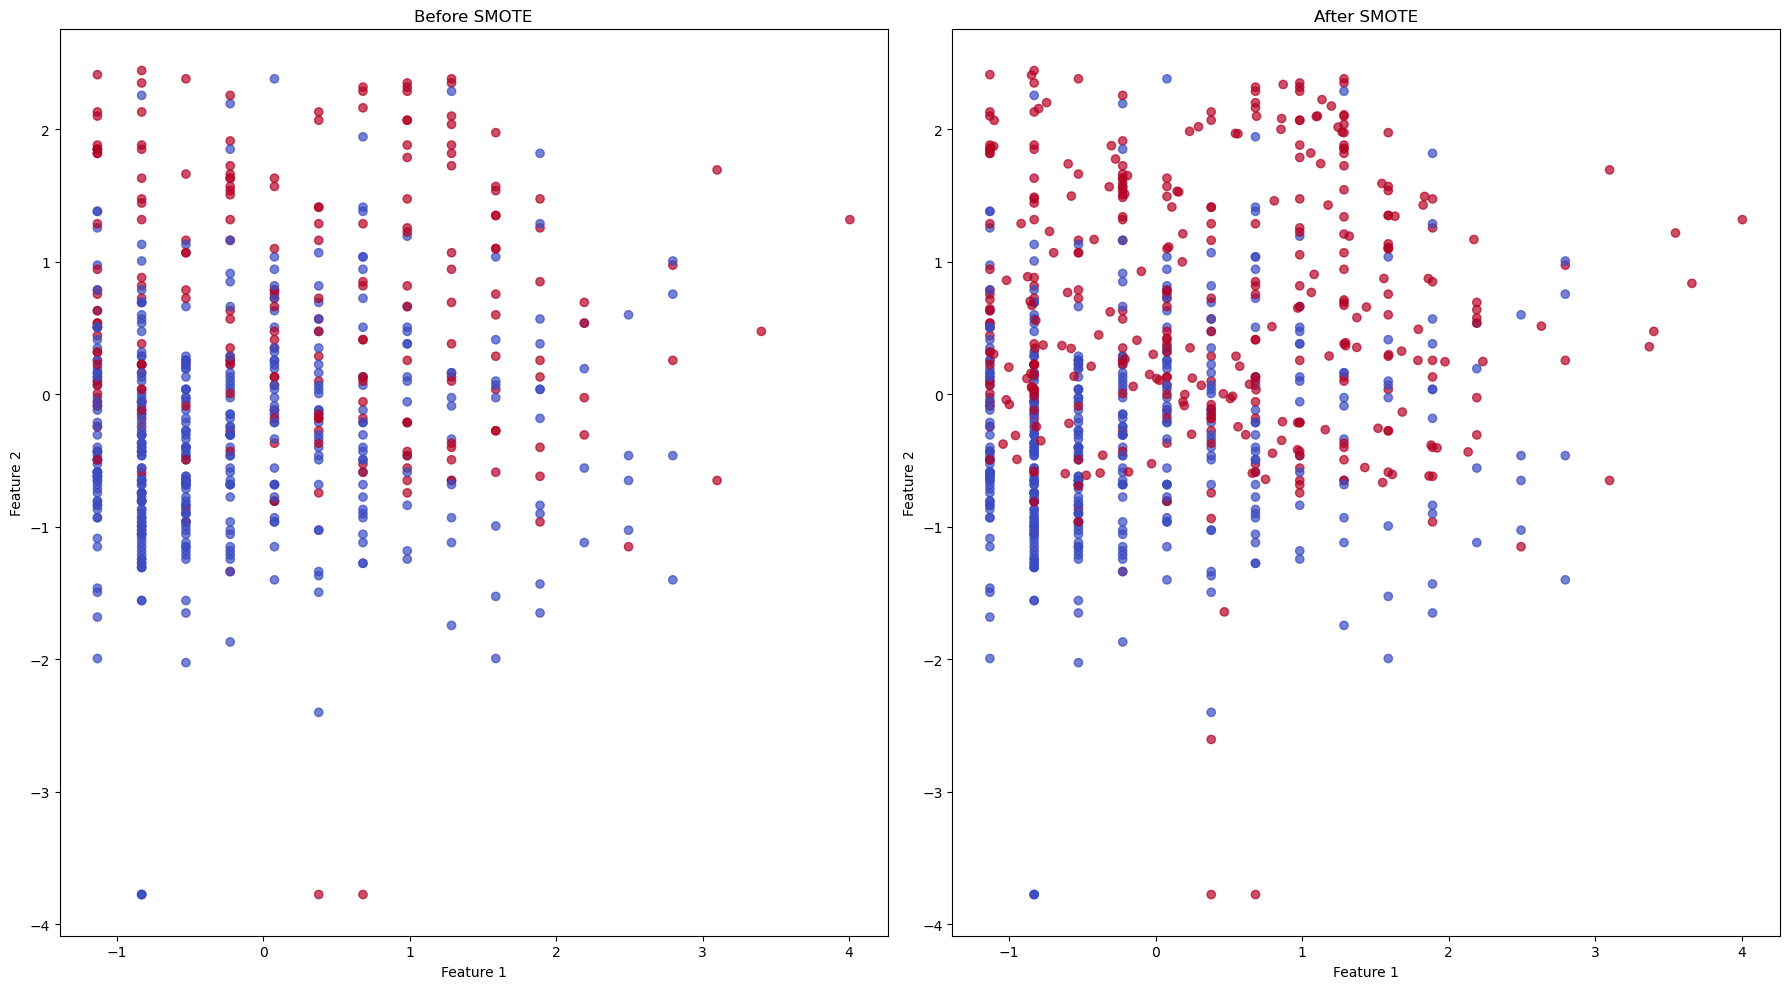

In [392]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plot before SMOTE
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("Before SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot after SMOTE
plt.subplot(1,2,2)
plt.scatter(X_resampled.iloc[:,0], X_resampled.iloc[:,1], c=y_resampled, cmap='coolwarm', alpha=0.7)
plt.title("After SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [409]:
X_train_resampled.iloc[:,0]

0     -0.526397
1      1.588046
2     -0.828460
3     -1.130523
4      0.681856
         ...   
797    0.969860
798    0.793941
799    1.975247
800   -1.130523
801    0.563002
Name: Pregnancies, Length: 802, dtype: float64

In [405]:
X_train_resampled[:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
797,0.969860,-0.215614,-0.184636,-1.322774,-0.701206,0.120628,-0.627199,0.789065
798,0.793941,0.509201,0.111850,0.276937,0.545930,0.621658,0.202062,-0.226938
799,1.975247,0.243965,0.092559,0.363195,0.359356,0.067994,-0.490102,0.924784
800,-1.130523,0.644120,-3.752683,-1.322774,-0.701206,1.374304,-0.635666,-0.319368


In [451]:
from xgboost import XGBClassifier
# Define XGBClassifier
xgb = XGBClassifier(
    n_estimators=100,       # number of trees
    max_depth=4,            # depth of each tree
    learning_rate=0.08,      # shrinkage step
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # column sampling
    scale_pos_weight=1,     # adjust for imbalance (set >1 if minority class is rare)
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"   # avoids warning
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.73
Confusion Matrix:
 [[79 20]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



c:\Users\abhis\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:35:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [432]:
from sklearn.naive_bayes import  GaussianNB



# Step 6: Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 7: Predict
y_pred = nb.predict(X_test)



# Step 8: Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.73
Confusion Matrix:
 [[81 18]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

